In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
import seaborn as sns


# cospectrum of w and b at the surface

In [32]:
CASE_NAME = 'gulf/'
BASE = '/scratch/ab10313/submeso_ML_data/'
PATH = BASE+CASE_NAME

PATH_RAW = PATH+'raw_data/'

B = xr.open_dataarray(PATH_RAW+'B.nc')
W = xr.open_dataarray(PATH_RAW+'W.nc')

In [3]:
dxC = xr.open_dataarray(PATH_RAW+'U.nc')['dxC']
dx = dxC.mean()

In [30]:
B_drop = B.drop(['PHrefC', 'Z', 'drF','CS', 'Depth', 'SN', 'XC', 'YC', 'dxF', 'dyF', 'rA','hFacC'])
W_drop = W.drop(['Zl', 'k_l', 'rhoRef','PHrefC', 'Z', 'drF','CS', 'Depth', 'SN', 'XC', 'YC', 'dxF', 'dyF', 'rA'])

NameError: name 'B' is not defined

In [21]:
del B, W

In [22]:
#  spectra
import xrft
B_spectra = xrft.isotropic_power_spectrum(B_drop.isel(time=slice(0,50),i=slice(100,-100),j=slice(100,-100)),dim=['i','j'], 
                                           detrend='linear', window=True).compute().mean('time')
del B_drop

/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:1025: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)


In [26]:
W_spectra = xrft.isotropic_power_spectrum(W_drop.isel(time=slice(0,50),i=slice(100,-100),j=slice(100,-100)),dim=['i','j'], 
                                           detrend='linear', window=True).compute().mean('time')
del W_drop

/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/ab10313/.local/lib/python3.9/site-packages/xrft/xrft.py:1025: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)


In [27]:
WB_cross_spectra = (W_spectra*np.conjugate(B_spectra)).real

In [28]:
k_r = B_spectra.freq_r/dx/1e-3

Text(0.5, 1.0, 'isotropic wb cross-spectrum')

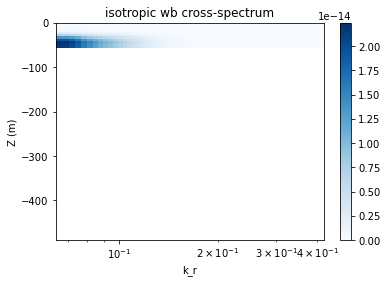

In [34]:
import matplotlib.colors as colors

plt.pcolor(k_r[20:], B.Z[:39], WB_cross_spectra[:39,20:], cmap='Blues')
plt.xscale("log")
plt.xlabel('k_r')
plt.ylabel('Z (m)')
plt.colorbar()
plt.title('isotropic wb cross-spectrum')

In [15]:
B_spectra

<xarray.DataArray (k: 45, freq_r: 180)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 35 36 37 38 39 40 41 42 43 44
    rhoRef   (k) float32 1.025e+03 1.025e+03 1.025e+03 ... 1.03e+03 1.03e+03
  * freq_r   (freq_r) float64 0.002456 0.00602 0.009953 ... 0.6968 0.7006 0.7042